In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,f1_score

In [2]:
data = pd.read_csv('/Users/miteshwandhare/Downloads/winequality-red.csv')

In [3]:
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data['good_quality'] = (data['quality'] >= 7).astype(int)
data.drop('quality', axis=1, inplace=True)

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
X = data.drop('good_quality' , axis =1 )
y = data['good_quality']

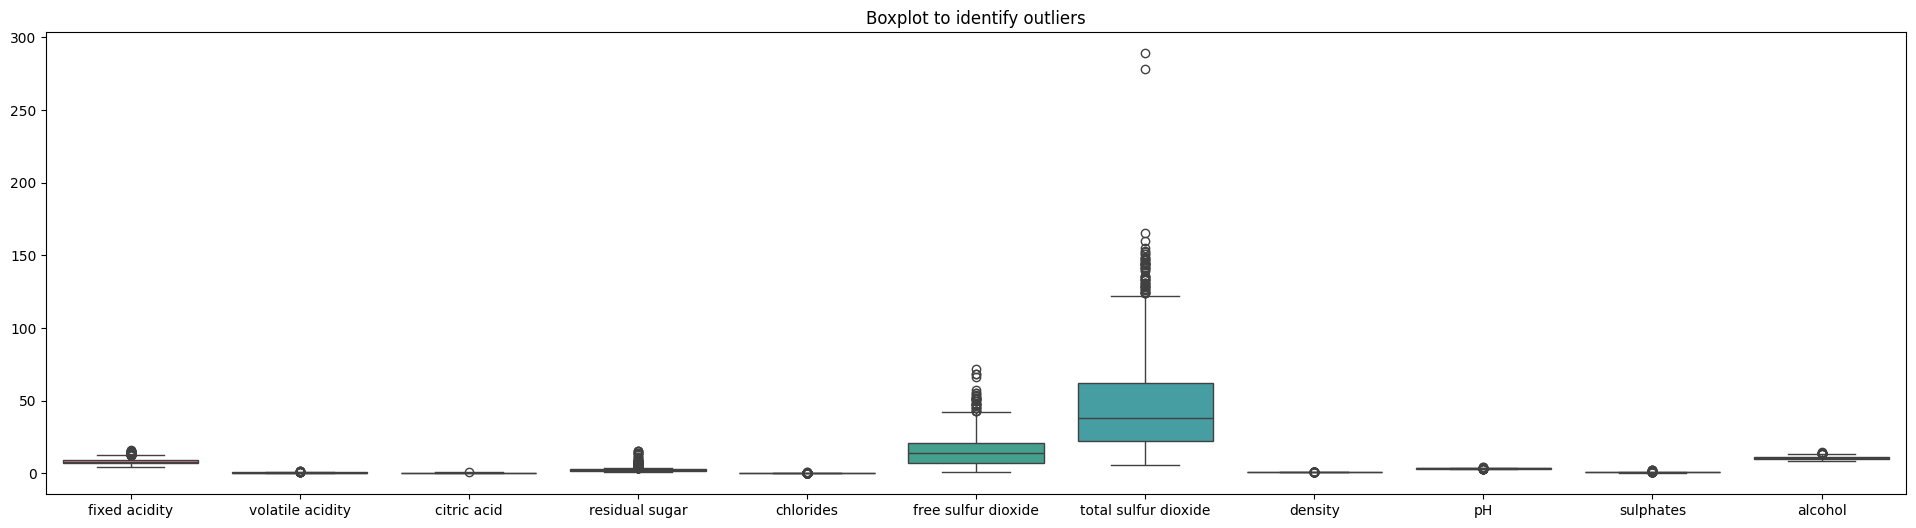

In [7]:
plt.figure(figsize = (24,6))
sns.boxplot(data = X)
plt.title("Boxplot to identify outliers")
plt.show()
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outliers = ((X < (Q1 - 1.5*IQR)) | (X > (Q3 + 1.5*IQR))).any(axis = 1)
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X_no_outliers,y_no_outliers , test_size = 0.2 , random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Logistic Regression
logreg_model = LogisticRegression(random_state = 1)
logreg_model.fit(X_train , y_train)
logreg_pred = logreg_model.predict(X_test)

# K-Nearest neighbours
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)

#Decision Trees Classifier
dt_model = DecisionTreeClassifier(random_state = 1)
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

#Random Forest Classifier
rf_model = RandomForestClassifier(random_state = 1)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

#Logistic Regression from Scratch using Gradient Descent
def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_function(X,y,weights):
    m = len(y)
    h = sigmoid(np.dot(X,weights))
    cost = -(1/m)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

def gradient_descent(X,y,weights,learning_rate,no_of_iterations):
    m = len(y)
    for _ in range(no_of_iterations):
        h = sigmoid(np.dot(X,weights))
        gradient = np.dot(X.T,(h-y))/m
        weights -= gradient
        return weights

X_train_logreg = np.c_[np.ones(X_train.shape[0]), X_train]

initial_weights = np.zeros(X_train_logreg.shape[1])
learning_rate = 0.0001
no_of_iterations = 1000

y_train_logreg = np.array(y_train)

weights_logreg = gradient_descent(X_train_logreg , y_train_logreg,initial_weights,learning_rate,no_of_iterations)
print(weights_logreg)
def predict_logreg(X,weights):
    X_with_bias  =np.c_[np.ones(X.shape[0]),X]
    predictions = sigmoid(np.dot(X_with_bias ,weights))
    return np.round(predictions).astype(int)

logreg_predictions = predict_logreg(X_test,weights_logreg)

[-0.37434555  0.0401663  -0.09250824  0.07447983  0.00519242 -0.05337867
 -0.02724388 -0.05802986 -0.0669119  -0.02924924  0.10597208  0.14181795]


In [16]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} - accuracy: {acc:.4f}, f1 Score: {f1:.4f}")

# Evaluate models
evaluate_model(y_test, logreg_pred, "Logistic Regression")
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")
evaluate_model(y_test, dt_pred, "Decision Trees Classifier")
evaluate_model(y_test, rf_pred, "Random Forest Classifier")
evaluate_model(y_test, logreg_predictions, "Logistic Regression using Gradient Descent")

Logistic Regression - accuracy: 0.9079, f1 Score: 0.5417
K-Nearest Neighbors - accuracy: 0.8745, f1 Score: 0.5000
Decision Trees Classifier - accuracy: 0.8912, f1 Score: 0.5000
Random Forest Classifier - accuracy: 0.9289, f1 Score: 0.6047
Logistic Regression using Gradient Descent - accuracy: 0.8285, f1 Score: 0.4938
